Getting all the stuffs


In [165]:
import os

In [166]:
import  tensorflow as tf

In [167]:
import os

In [168]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [169]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [170]:
gpus

[]

In [171]:
import imghdr

Remove the dodgy images


In [172]:

import cv2

In [173]:
data_dir = 'data'

In [174]:
image_exts = ['jpeg','jpg','bmp','png']

In [175]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [176]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [177]:
import matplotlib.pyplot as plt

In [178]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image{}".format(image_path))

Loading the Data

In [179]:
import numpy as np

In [180]:
data = tf.keras.utils.image_dataset_from_directory(
    "data",
    image_size=(256, 256),   # ensures consistent size
    batch_size=32
)

Found 171 files belonging to 2 classes.


In [181]:
data_iterator = data.as_numpy_iterator()

In [182]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000213AFC1AA80>)

In [183]:
batch = data_iterator.next()

In [184]:
batch[0].shape

(32, 256, 256, 3)

In [185]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

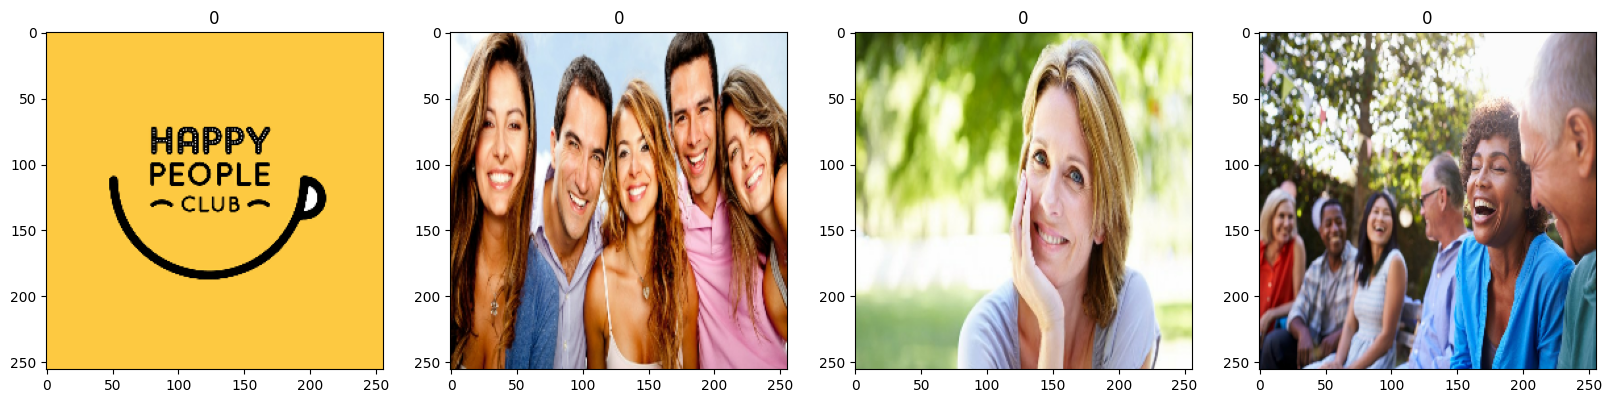

In [186]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [187]:
scaled = batch[0]/255

In [188]:
scaled.max()

1.0

Scaling the Data

In [189]:
data = data.map(lambda x,y :(x/255,y))

In [190]:
scaled_iterator = data.as_numpy_iterator()

In [191]:
scaled_iterator.next()[0].max()

1.0

In [192]:
len(data)

6

Splitting the data

In [193]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [194]:
test_size + train_size + val_size

6

In [195]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Building Deep Learning Model


In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [197]:
model = Sequential()

In [198]:
model.add(Conv2D(16,(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\arpan\Desktop\Image CLASSIFIER\arpan\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [200]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [201]:
logdir = 'logs'

In [202]:
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [203]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorflow_callback])

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.5312 - loss: 0.9117 - val_accuracy: 0.5625 - val_loss: 0.6317
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.5781 - loss: 0.6105 - val_accuracy: 0.4688 - val_loss: 0.6508
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.7031 - loss: 0.5135 - val_accuracy: 0.8750 - val_loss: 0.4025
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.7656 - loss: 0.4353 - val_accuracy: 0.9062 - val_loss: 0.3112
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step - accuracy: 0.8672 - loss: 0.3715 - val_accuracy: 0.8125 - val_loss: 0.3312
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.8359 - loss: 0.3461 - val_accuracy: 0.8125 - val_loss: 0.4316
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step - accuracy: 0.8906 - loss: 0.2730 - val_accuracy: 0.8750 - val_loss: 0.2543
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.9219 - loss: 0.2222 - val_accuracy: 0.9688 - val_loss: 0.1358
Epo

In [204]:
hist.history

{'accuracy': [0.53125,
  0.578125,
  0.703125,
  0.765625,
  0.8671875,
  0.8359375,
  0.890625,
  0.921875,
  0.9453125,
  0.9765625,
  0.953125,
  0.9765625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.9116644263267517,
  0.6104977130889893,
  0.513456404209137,
  0.4352569282054901,
  0.37145617604255676,
  0.3461441695690155,
  0.27295568585395813,
  0.22218754887580872,
  0.15345266461372375,
  0.12164697051048279,
  0.12595708668231964,
  0.10001605749130249,
  0.055538471788167953,
  0.04927826300263405,
  0.03176744654774666,
  0.015269455499947071,
  0.008119761012494564,
  0.004421672783792019,
  0.0030492700170725584,
  0.002659971360117197],
 'val_accuracy': [0.5625,
  0.46875,
  0.875,
  0.90625,
  0.8125,
  0.8125,
  0.875,
  0.96875,
  0.96875,
  1.0,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6317014694213867,
  0.650841474533081,
  0.40253710746765137,
  0.3111966550350189,
  0.3311845660209656,
 

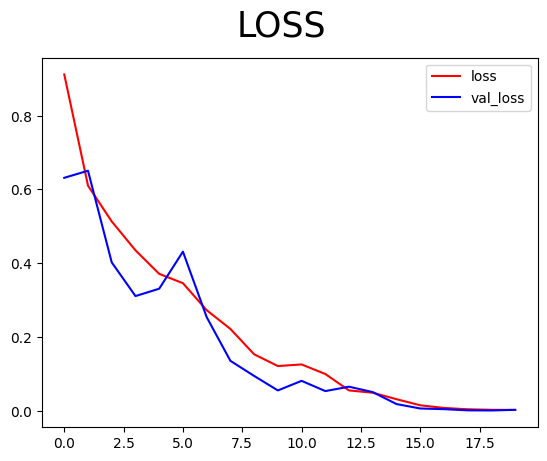

In [205]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label = 'loss')
plt.plot(hist.history['val_loss'], color='blue', label = 'val_loss')
fig.suptitle('LOSS', fontsize=25)
plt.legend(loc="upper right")
plt.show()

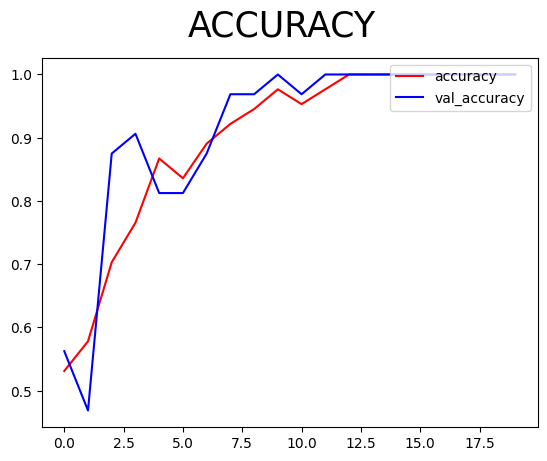

In [206]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label = 'val_accuracy')
fig.suptitle('ACCURACY', fontsize=25)
plt.legend(loc="upper right")
plt.show()

Evaluating testing

In [207]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [208]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [209]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [210]:
print(pre.result(),re.result(),acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Testing 

In [211]:
import cv2

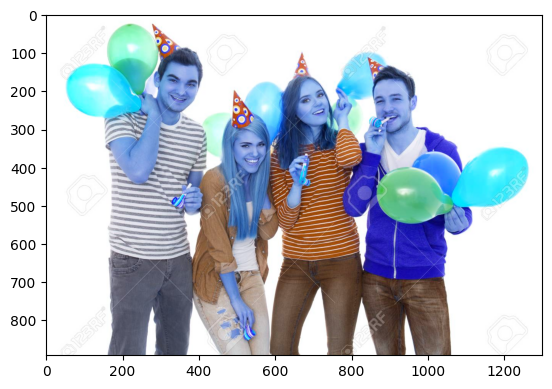

In [220]:
img = cv2.imread('goodlooking.jpg')
plt.imshow(img)
plt.show()

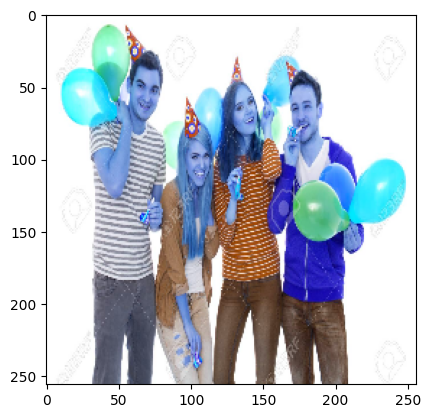

In [221]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0)

array([[[[  8.      ,   8.      ,   8.      ],
         [  8.      ,   8.      ,   8.      ],
         [  8.      ,   8.      ,   8.      ],
         ...,
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ]],

        [[  7.      ,   7.      ,   7.      ],
         [  7.      ,   7.      ,   7.      ],
         [  7.      ,   7.      ,   7.      ],
         ...,
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ]],

        [[  6.751953,   6.751953,   6.751953],
         [  6.751953,   6.751953,   6.751953],
         [  6.751953,   6.751953,   6.751953],
         ...,
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ],
         [  6.      ,   6.      ,   6.      ]],

        ...,

        [[234.57617 , 234.57617 , 234.57617 ],
         [231.      , 231.      , 231.      ]

In [222]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [223]:
yhat

array([[0.00824436]], dtype=float32)

In [224]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Saving the model


In [225]:
from tensorflow.keras.models import load_model

In [226]:
model.save(os.path.join('models','happyandsadmodel.h5'))

In [227]:
new_model = load_model(os.path.join('models','happyandsadmodel.h5'))

In [228]:
new_model

<Sequential name=sequential_2, built=True>

In [230]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [231]:
yhat_new

array([[0.00824436]], dtype=float32)

In [232]:
if yhat_new > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
